Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259411 entries, 0 to 1259410
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1259411 non-null  int64         
 1   timecreated  1259411 non-null  datetime64[ns]
 2   eventname    1259411 non-null  object        
 3   action       1259411 non-null  object        
 4   target       1259411 non-null  object        
 5   userid       1259411 non-null  int64         
 6   courseid     1259411 non-null  int64         
 7   other        647118 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 76.9+ MB
None 

5 dòng đầu:
        id         timecreated                               eventname  \
0  9194694 2022-09-01 06:22:13               \core\event\user_loggedin   
1  9194695 2022-09-01 06:22:14            \core\event\dashboard_viewed   
2  9194708 2022-09-01 06:31:57  \core\event\webs

<Figure size 1000x600 with 0 Axes>

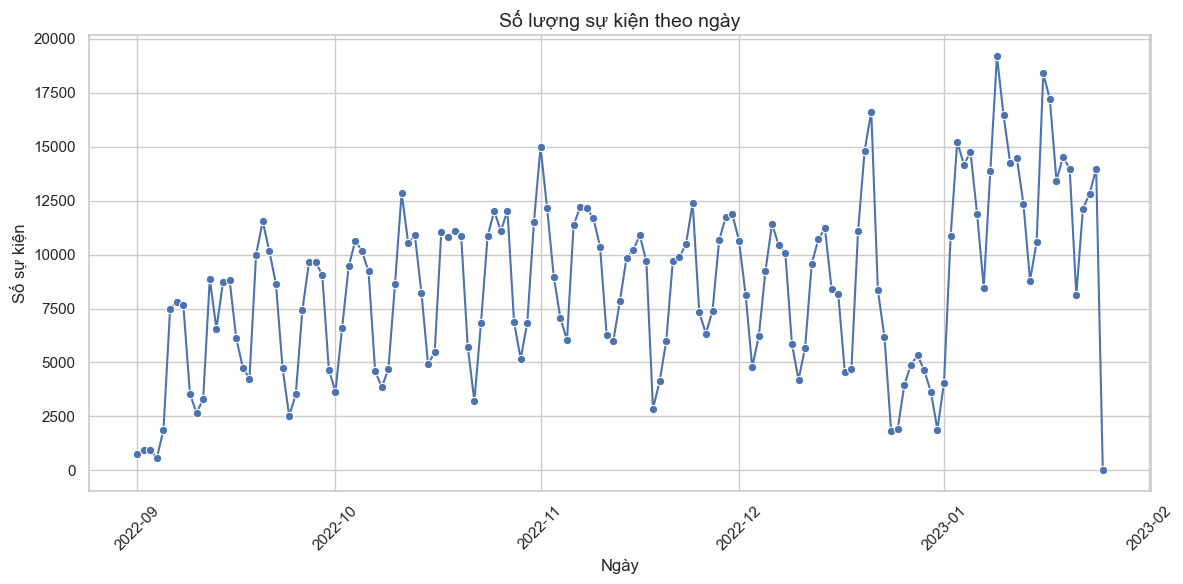

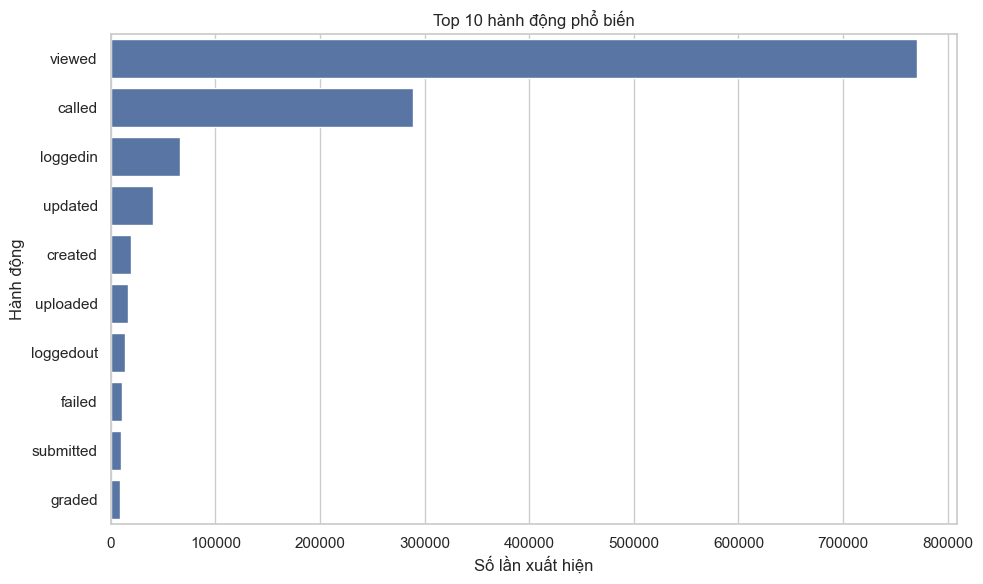

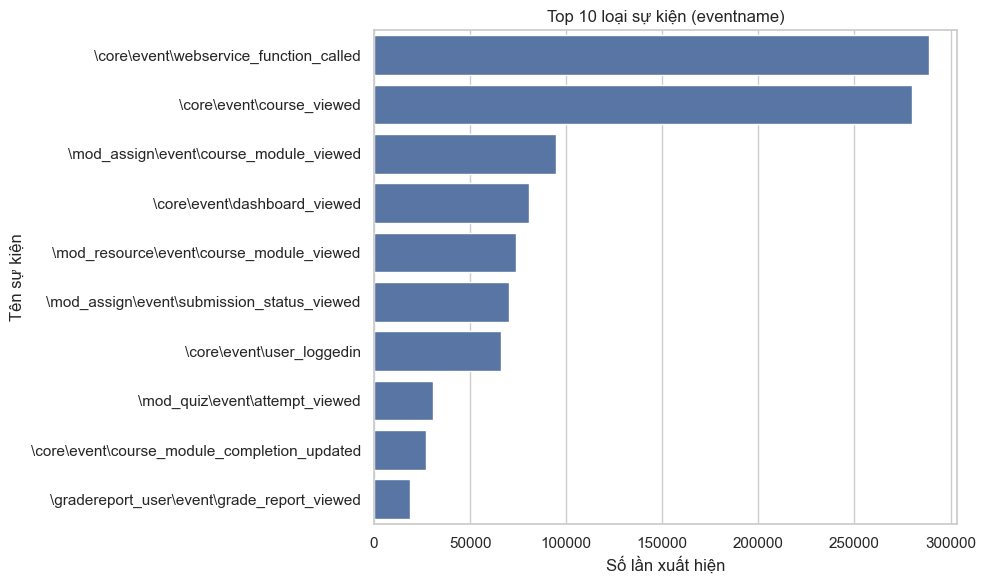

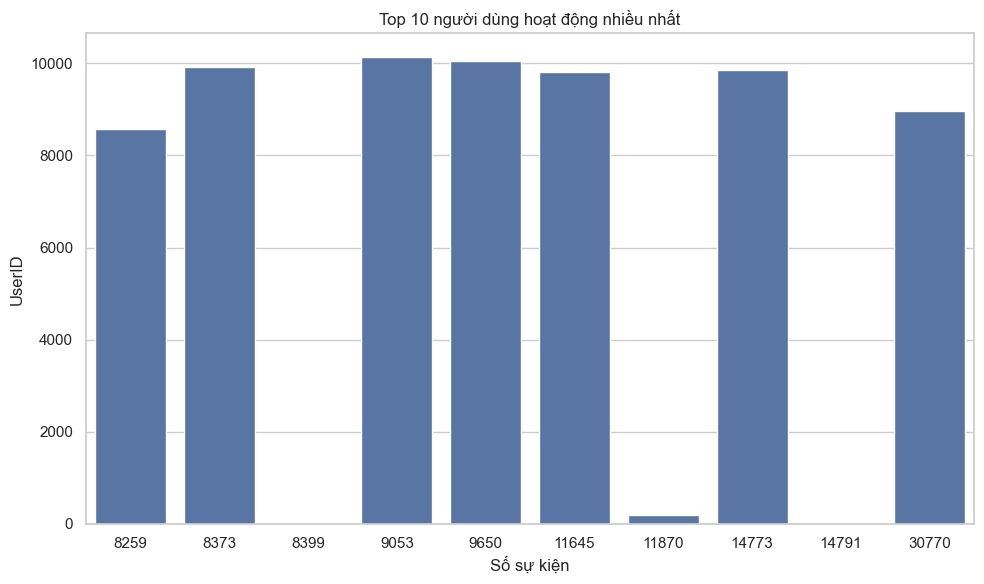

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# === 1. Đọc file CSV ===
df = pd.read_csv("../data/udk_moodle_log.csv")

# === 2. Làm sạch dữ liệu cơ bản ===
df['timecreated'] = pd.to_datetime(df['timecreated'], unit='s', errors='coerce')
df['other'] = df['other'].apply(lambda x: json.loads(x) if isinstance(x, str) and x != 'null' else None)

# === 3. EDA cơ bản ===
print("Thông tin dataset:")
print(df.info(), "\n")

print("5 dòng đầu:")
print(df.head(), "\n")

print("Số lượng giá trị thiếu:")
print(df.isna().sum(), "\n")

print("Top 10 eventname:")
print(df['eventname'].value_counts().head(10), "\n")

print("Top 10 hành động (action):")
print(df['action'].value_counts().head(10), "\n")

print("Top 10 người dùng hoạt động:")
print(df['userid'].value_counts().head(10), "\n")

# === 4. Thiết lập style cho biểu đồ ===
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# === Biểu đồ 1: Số lượng sự kiện theo ngày ===
df['date'] = df['timecreated'].dt.date
events_per_day = df.groupby('date')['id'].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='id', data=events_per_day, marker='o')
plt.title('Số lượng sự kiện theo ngày', fontsize=14)
plt.xlabel('Ngày')
plt.ylabel('Số sự kiện')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Biểu đồ 2: Top 10 loại hành động (action) ===
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='action', order=df['action'].value_counts().index[:10])
plt.title('Top 10 hành động phổ biến')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Hành động')
plt.tight_layout()
plt.show()

# === Biểu đồ 3: Top 10 loại eventname ===
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='eventname', order=df['eventname'].value_counts().index[:10])
plt.title('Top 10 loại sự kiện (eventname)')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Tên sự kiện')
plt.tight_layout()
plt.show()

# === Biểu đồ 4: Top 10 người dùng hoạt động nhiều nhất ===
plt.figure(figsize=(10,6))
top_users = df['userid'].value_counts().head(10)
sns.barplot(x=top_users.values, y=top_users.index)
plt.title('Top 10 người dùng hoạt động nhiều nhất')
plt.xlabel('Số sự kiện')
plt.ylabel('UserID')
plt.tight_layout()
plt.show()

✅ Đã xuất file CSV sau khi lọc: ../data/udk_moodle_log_filtered.csv
Số dòng trước khi lọc: 1259411, sau khi lọc: 970560

Top 10 eventname (đã lọc):
eventname
\core\event\course_viewed                          279917
\mod_assign\event\course_module_viewed              94557
\core\event\dashboard_viewed                        80736
\mod_resource\event\course_module_viewed            74133
\mod_assign\event\submission_status_viewed          70439
\core\event\user_loggedin                           66271
\mod_quiz\event\attempt_viewed                      30620
\core\event\course_module_completion_updated        26857
\gradereport_user\event\grade_report_viewed         18850
\gradereport_overview\event\grade_report_viewed     18720
Name: count, dtype: int64 

Top 10 hành động (action):
action
viewed       770749
loggedin      66271
updated       40652
created       19070
uploaded      16678
loggedout     13590
failed        10495
submitted      9655
graded         8833
sent           4103


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/1127567325.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['timecreated'].dt.date


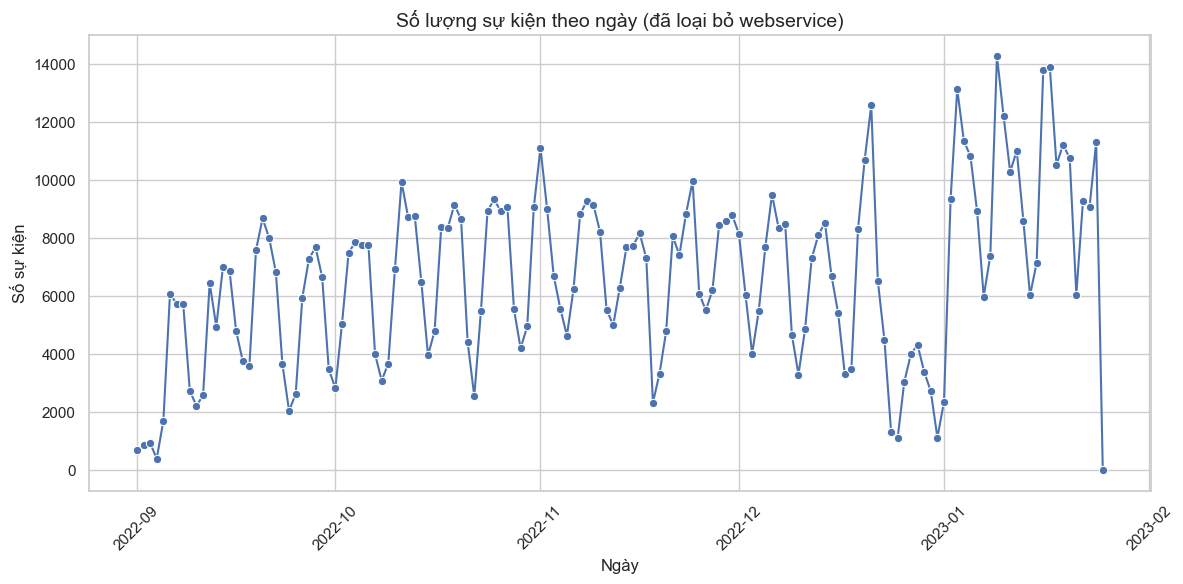

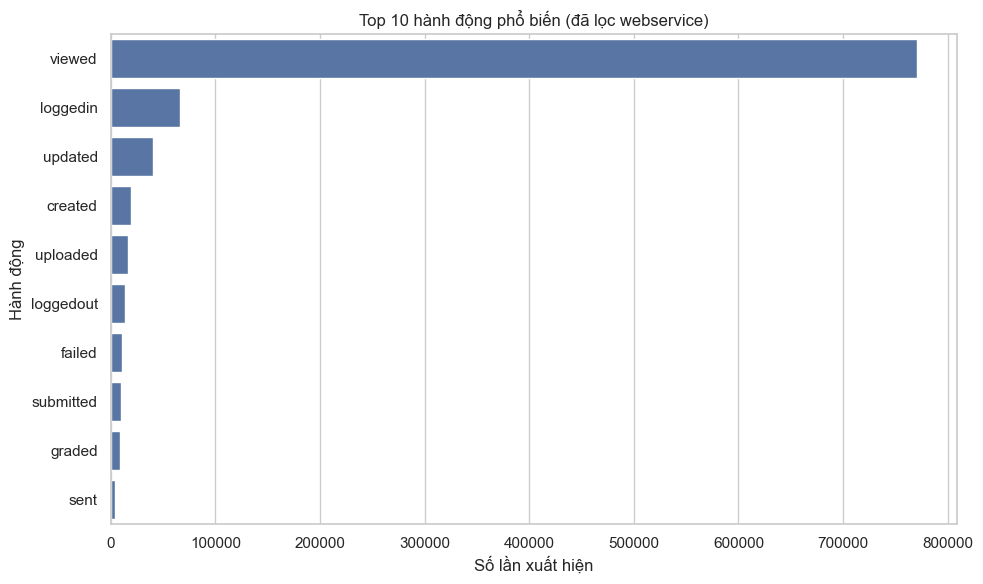

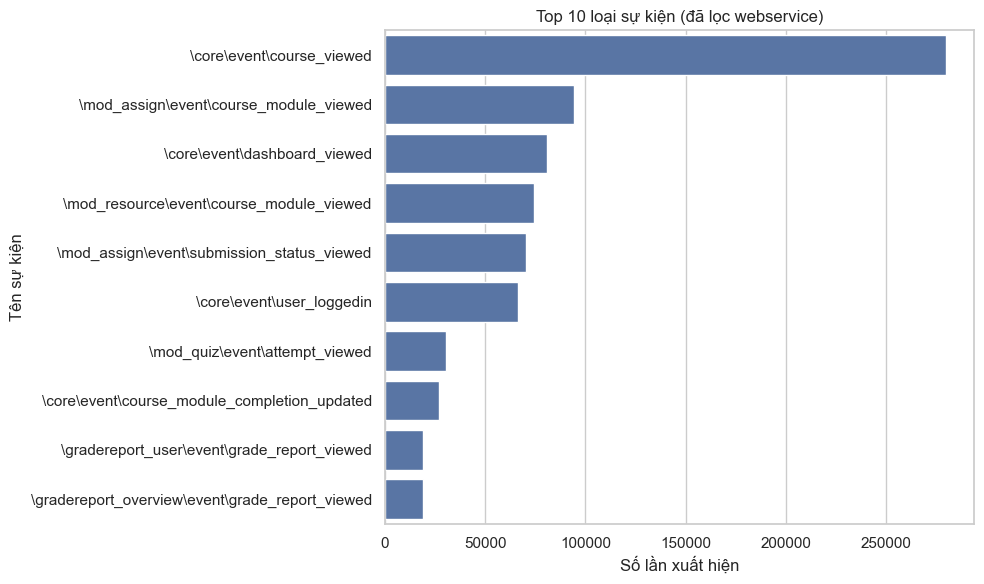

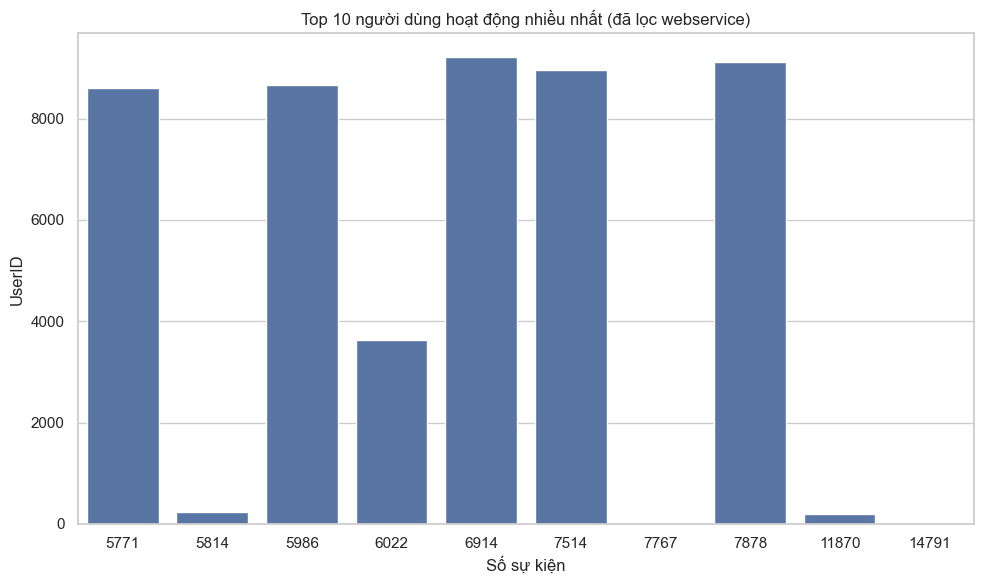

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# === 1. Đọc file CSV gốc ===
df = pd.read_csv("../data/udk_moodle_log.csv")

# === 2. Làm sạch dữ liệu cơ bản ===
df['timecreated'] = pd.to_datetime(df['timecreated'], unit='s', errors='coerce')
df['other'] = df['other'].apply(lambda x: json.loads(x) if isinstance(x, str) and x != 'null' else None)

# === 3. Loại bỏ các dòng webservice_function_called ===
df_filtered = df[df['eventname'] != '\\core\\event\\webservice_function_called']

# === 4. Xuất file CSV đã lọc ===
output_path = "../data/udk_moodle_log_filtered.csv"
df_filtered.to_csv(output_path, index=False)
print(f"✅ Đã xuất file CSV sau khi lọc: {output_path}")
print(f"Số dòng trước khi lọc: {len(df)}, sau khi lọc: {len(df_filtered)}")

# === 5. EDA cơ bản ===
print("\nTop 10 eventname (đã lọc):")
print(df_filtered['eventname'].value_counts().head(10), "\n")

print("Top 10 hành động (action):")
print(df_filtered['action'].value_counts().head(10), "\n")

print("Top 10 người dùng hoạt động:")
print(df_filtered['userid'].value_counts().head(10), "\n")

# === 6. Thiết lập style cho biểu đồ ===
sns.set(style="whitegrid")

# === Biểu đồ 1: Số lượng sự kiện theo ngày ===
df_filtered['date'] = df_filtered['timecreated'].dt.date
events_per_day = df_filtered.groupby('date')['id'].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='id', data=events_per_day, marker='o')
plt.title('Số lượng sự kiện theo ngày (đã loại bỏ webservice)', fontsize=14)
plt.xlabel('Ngày')
plt.ylabel('Số sự kiện')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Biểu đồ 2: Top 10 hành động (action) ===
plt.figure(figsize=(10,6))
sns.countplot(data=df_filtered, y='action', order=df_filtered['action'].value_counts().index[:10])
plt.title('Top 10 hành động phổ biến (đã lọc webservice)')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Hành động')
plt.tight_layout()
plt.show()

# === Biểu đồ 3: Top 10 eventname ===
plt.figure(figsize=(10,6))
sns.countplot(data=df_filtered, y='eventname', order=df_filtered['eventname'].value_counts().index[:10])
plt.title('Top 10 loại sự kiện (đã lọc webservice)')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Tên sự kiện')
plt.tight_layout()
plt.show()

# === Biểu đồ 4: Top 10 người dùng hoạt động nhiều nhất ===
plt.figure(figsize=(10,6))
top_users = df_filtered['userid'].value_counts().head(10)
sns.barplot(x=top_users.values, y=top_users.index)
plt.title('Top 10 người dùng hoạt động nhiều nhất (đã lọc webservice)')
plt.xlabel('Số sự kiện')
plt.ylabel('UserID')
plt.tight_layout()
plt.show()

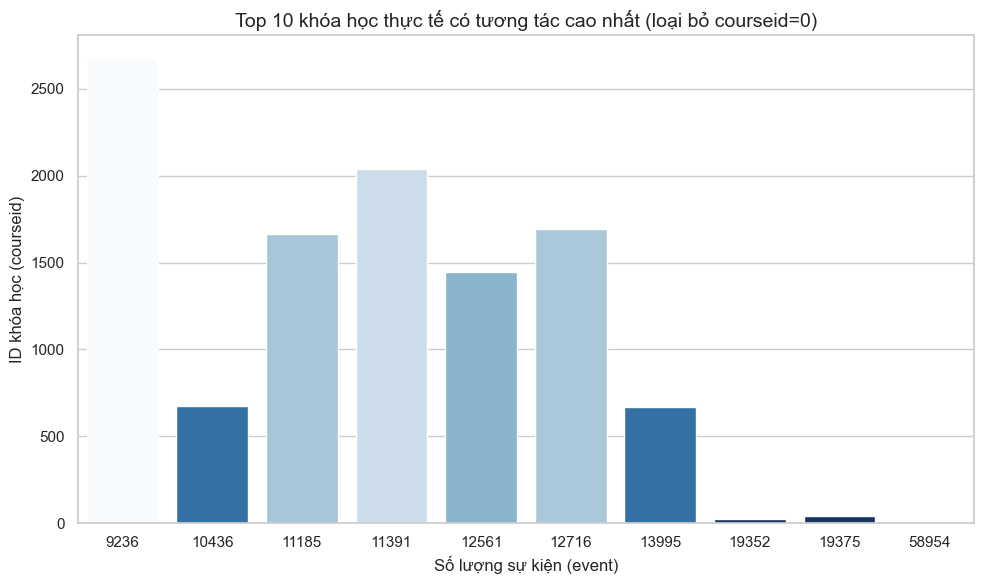

   courseid  event_count
0         1        58954
1        42        19375
2        25        19352
3       670        13995
4      1695        12716
5      1445        12561
6      2037        11391
7      1662        11185
8       677        10436
9      2675         9236
Top 15 khóa học có nhiều hoạt động nhất:
courseid
1       58954
42      19375
25      19352
670     13995
1695    12716
1445    12561
2037    11391
1662    11185
677     10436
2675     9236
2039     8642
2050     8503
3128     8364
2031     8170
2042     7559
Name: id, dtype: int64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df_filtered là DataFrame chứa toàn bộ dữ liệu gốc
df_filtered = pd.read_csv("../data/udk_moodle_log_filtered.csv")

df_filtered['timecreated'] = pd.to_datetime(df_filtered['timecreated'], errors='coerce')
df_courses = df_filtered[df_filtered['courseid'] > 0]

course_activity = (
    df_courses.groupby('courseid')['id']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'id': 'event_count'})
)

top_courses = course_activity.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    y='courseid',
    x='event_count',
    data=top_courses,
    hue='courseid',
    legend=False,
    palette='Blues_r'
)
plt.title('Top 10 khóa học thực tế có tương tác cao nhất (loại bỏ courseid=0)', fontsize=14)
plt.xlabel('Số lượng sự kiện (event)')
plt.ylabel('ID khóa học (courseid)')
plt.tight_layout()
plt.show()

print(top_courses)
course_activity = (
    df_filtered[df_filtered['courseid'] > 0]  # bỏ courseid = 0
    .groupby('courseid')['id']
    .count()
    .sort_values(ascending=False)
)

print("Top 15 khóa học có nhiều hoạt động nhất:")
print(course_activity.head(15))

📘 Khóa học 1: 58954 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


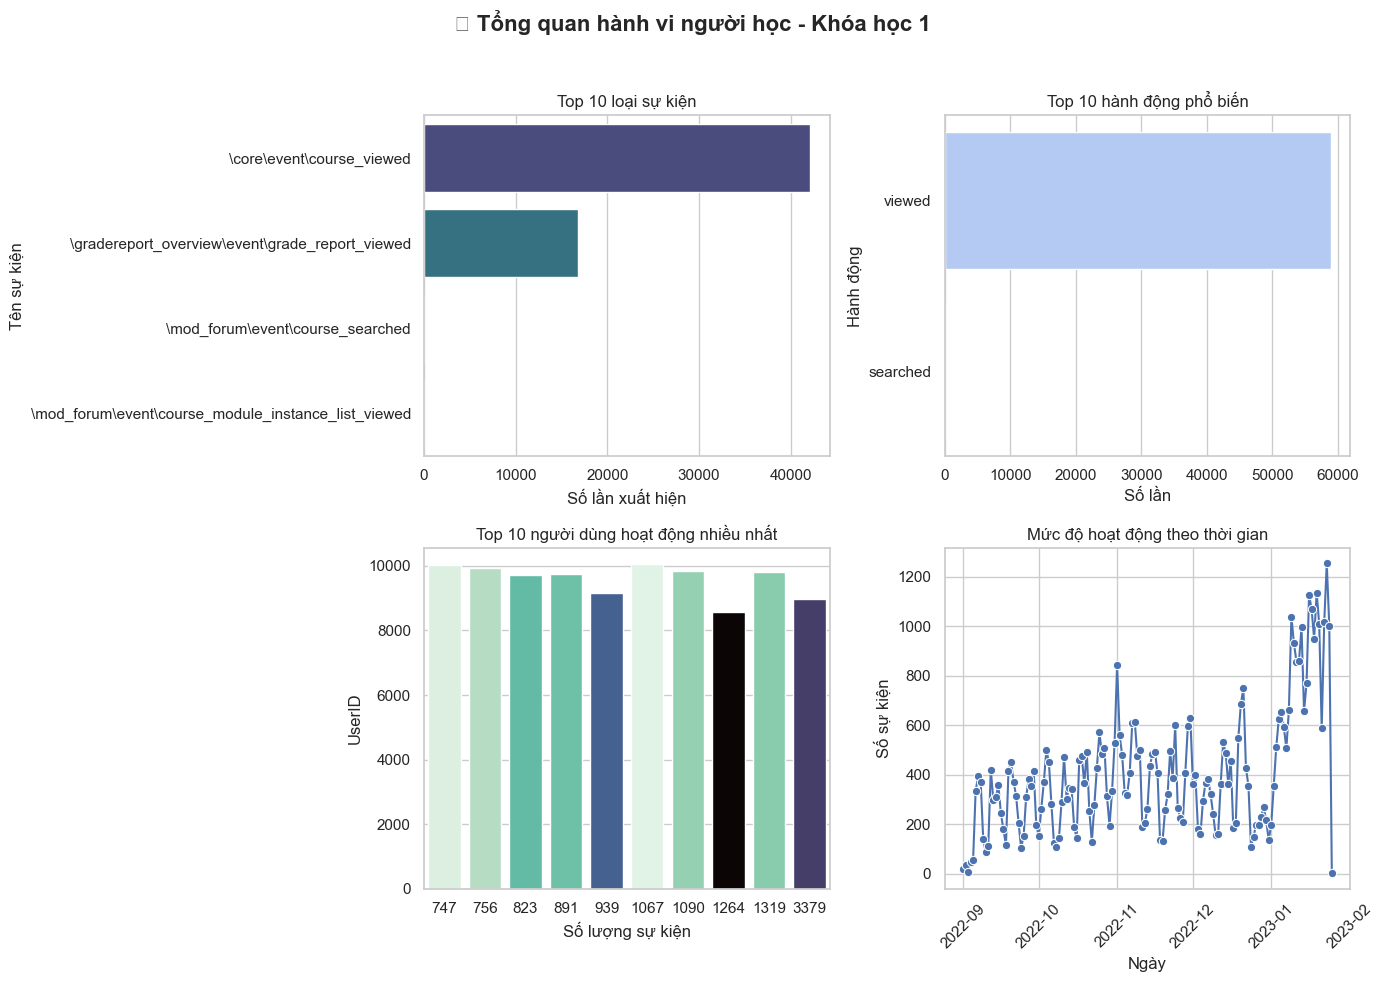

Số loại sự kiện khác nhau: 4

Top eventname:
eventname
\core\event\course_viewed                              42167
\gradereport_overview\event\grade_report_viewed        16785
\mod_forum\event\course_searched                           1
\mod_forum\event\course_module_instance_list_viewed        1
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 42: 19375 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


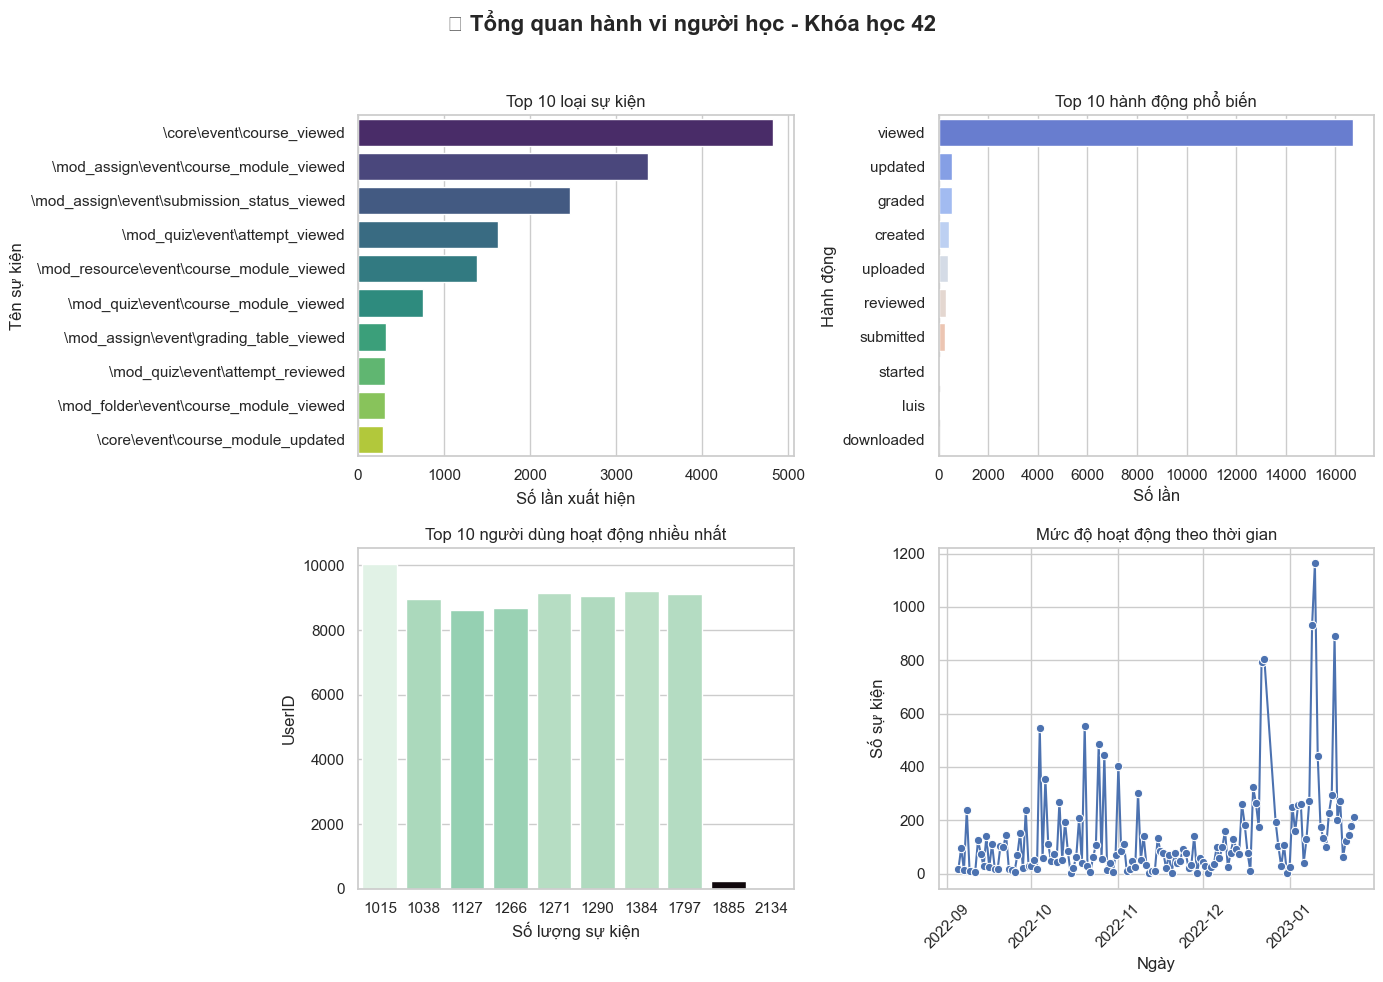

Số loại sự kiện khác nhau: 71

Top eventname:
eventname
\core\event\course_viewed                     4823
\mod_assign\event\course_module_viewed        3367
\mod_assign\event\submission_status_viewed    2462
\mod_quiz\event\attempt_viewed                1629
\mod_resource\event\course_module_viewed      1380
\mod_quiz\event\course_module_viewed           759
\mod_assign\event\grading_table_viewed         323
\mod_quiz\event\attempt_reviewed               318
\mod_folder\event\course_module_viewed         311
\core\event\course_module_updated              293
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 25: 19352 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


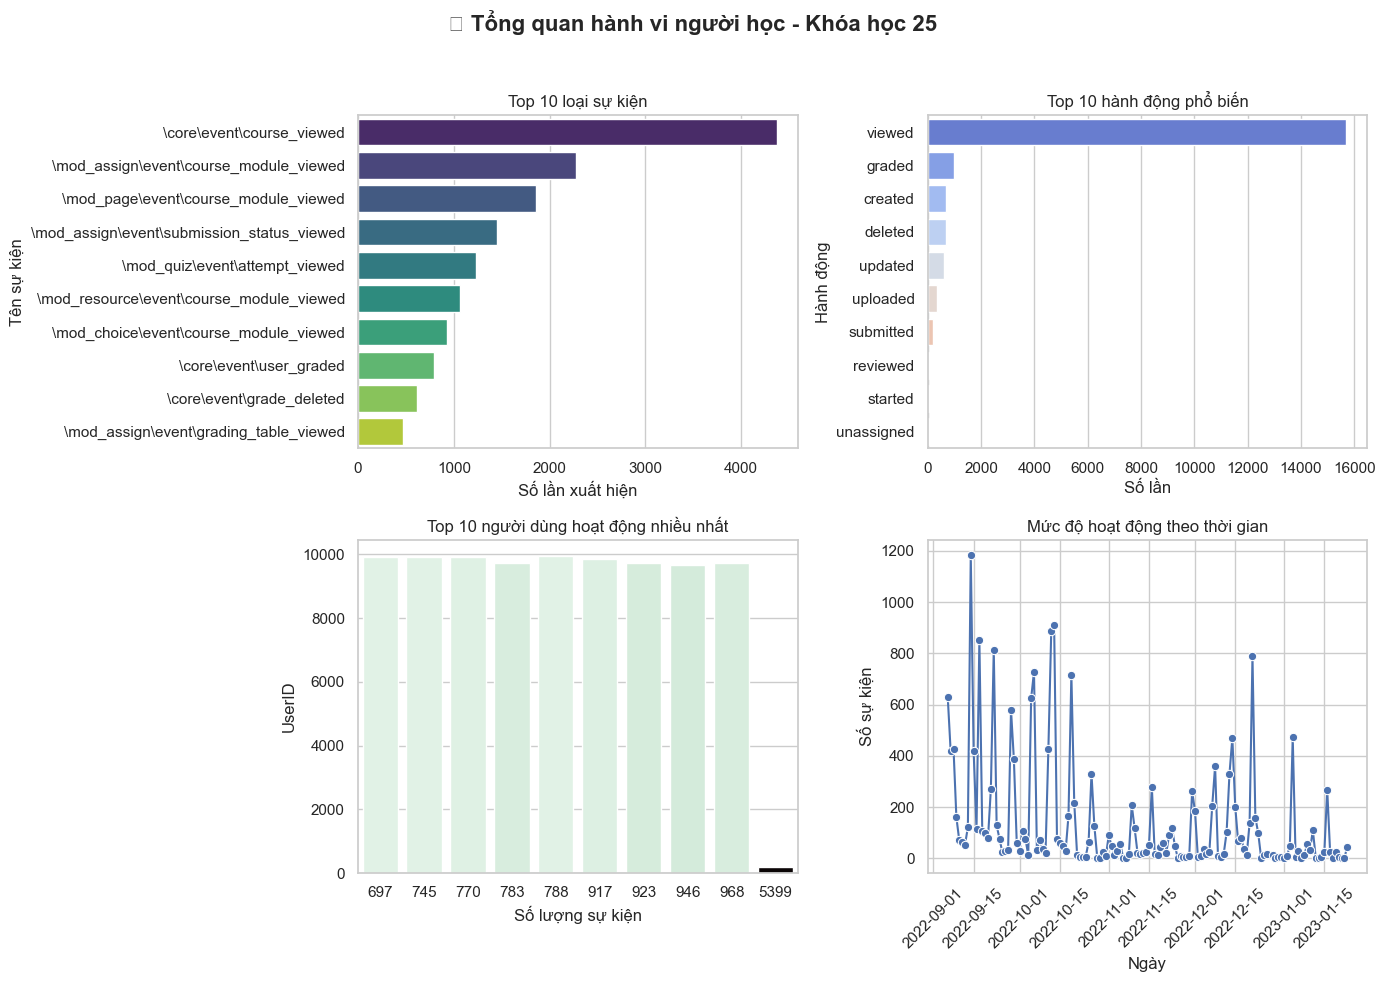

Số loại sự kiện khác nhau: 63

Top eventname:
eventname
\core\event\course_viewed                     4371
\mod_assign\event\course_module_viewed        2278
\mod_page\event\course_module_viewed          1856
\mod_assign\event\submission_status_viewed    1445
\mod_quiz\event\attempt_viewed                1228
\mod_resource\event\course_module_viewed      1061
\mod_choice\event\course_module_viewed         927
\core\event\user_graded                        789
\core\event\grade_deleted                      615
\mod_assign\event\grading_table_viewed         468
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 670: 13995 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


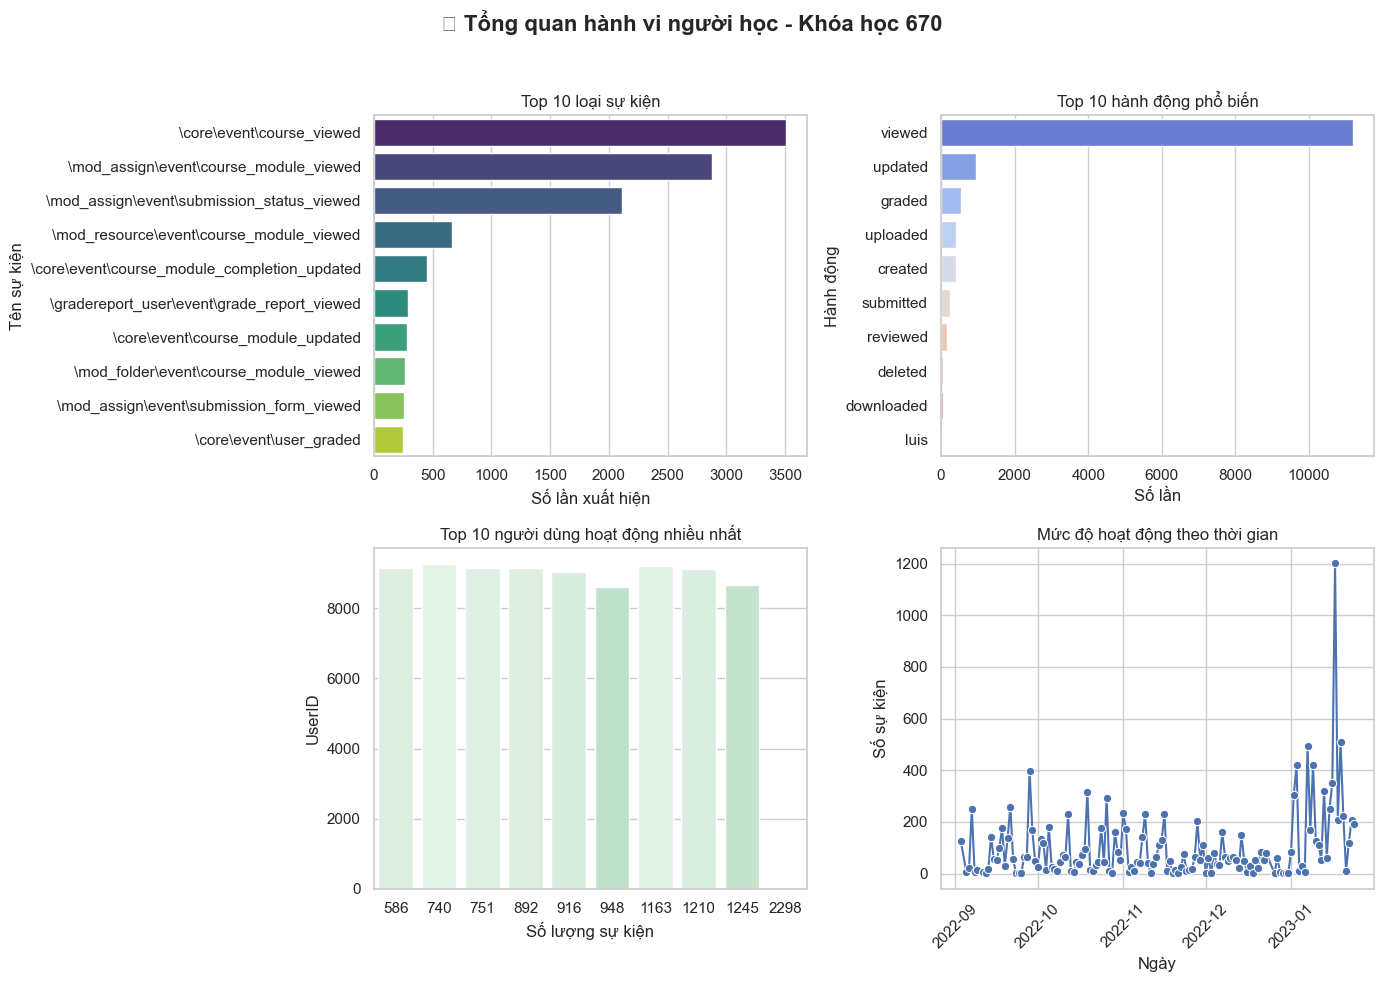

Số loại sự kiện khác nhau: 65

Top eventname:
eventname
\core\event\course_viewed                       3509
\mod_assign\event\course_module_viewed          2873
\mod_assign\event\submission_status_viewed      2115
\mod_resource\event\course_module_viewed         667
\core\event\course_module_completion_updated     451
\gradereport_user\event\grade_report_viewed      290
\core\event\course_module_updated                283
\mod_folder\event\course_module_viewed           264
\mod_assign\event\submission_form_viewed         253
\core\event\user_graded                          249
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 1695: 12716 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


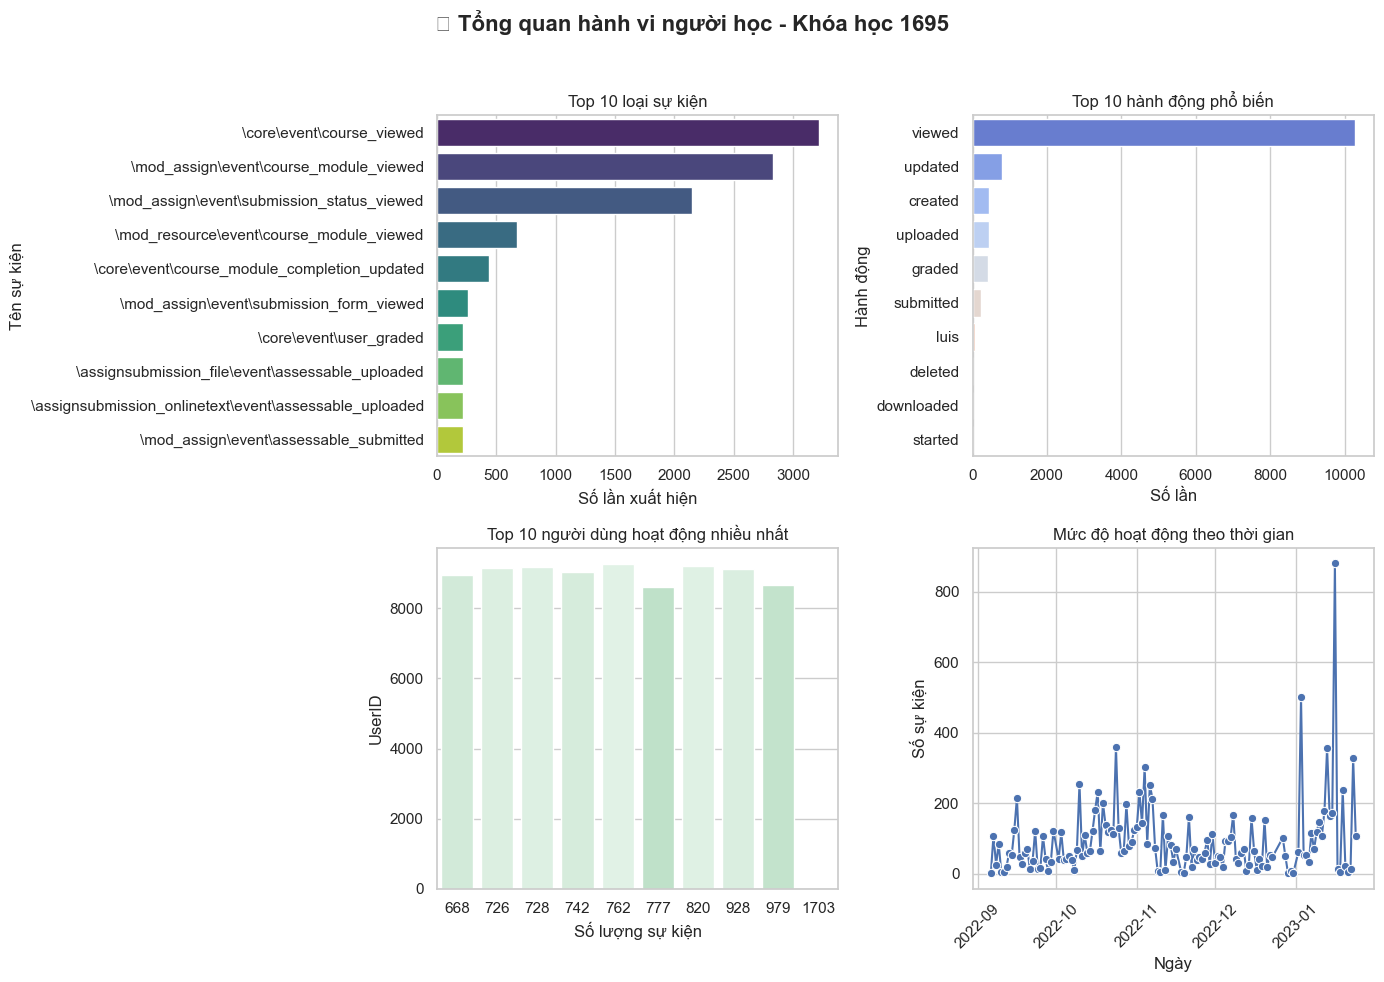

Số loại sự kiện khác nhau: 56

Top eventname:
eventname
\core\event\course_viewed                                 3222
\mod_assign\event\course_module_viewed                    2832
\mod_assign\event\submission_status_viewed                2148
\mod_resource\event\course_module_viewed                   671
\core\event\course_module_completion_updated               439
\mod_assign\event\submission_form_viewed                   261
\core\event\user_graded                                    223
\assignsubmission_file\event\assessable_uploaded           220
\assignsubmission_onlinetext\event\assessable_uploaded     220
\mod_assign\event\assessable_submitted                     220
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 1445: 12561 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


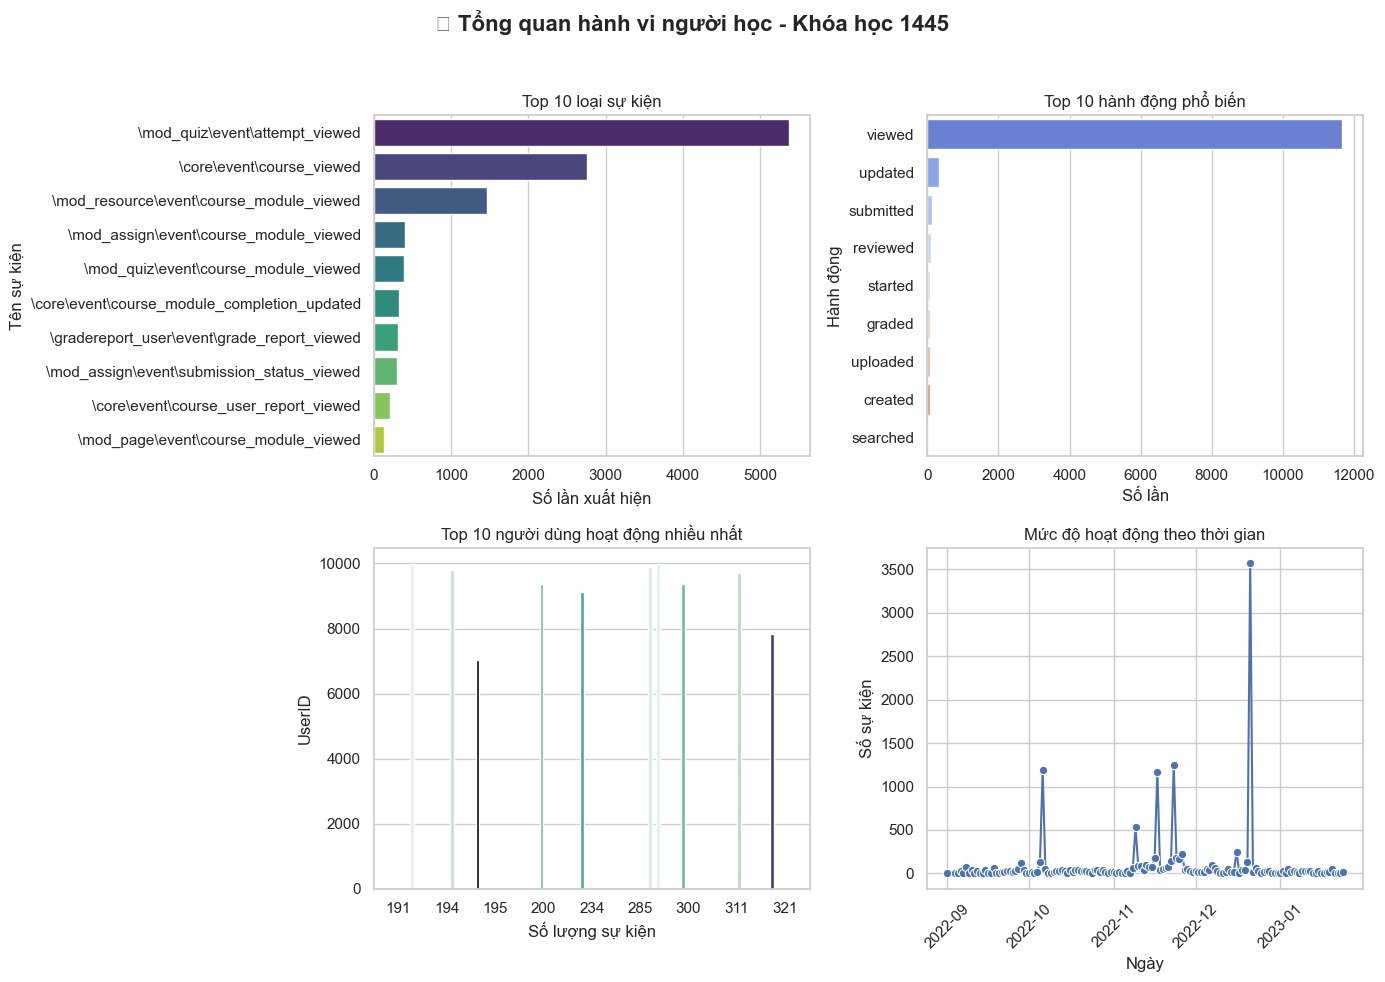

Số loại sự kiện khác nhau: 36

Top eventname:
eventname
\mod_quiz\event\attempt_viewed                  5374
\core\event\course_viewed                       2763
\mod_resource\event\course_module_viewed        1460
\mod_assign\event\course_module_viewed           397
\mod_quiz\event\course_module_viewed             388
\core\event\course_module_completion_updated     323
\gradereport_user\event\grade_report_viewed      310
\mod_assign\event\submission_status_viewed       303
\core\event\course_user_report_viewed            204
\mod_page\event\course_module_viewed             129
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 2037: 11391 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


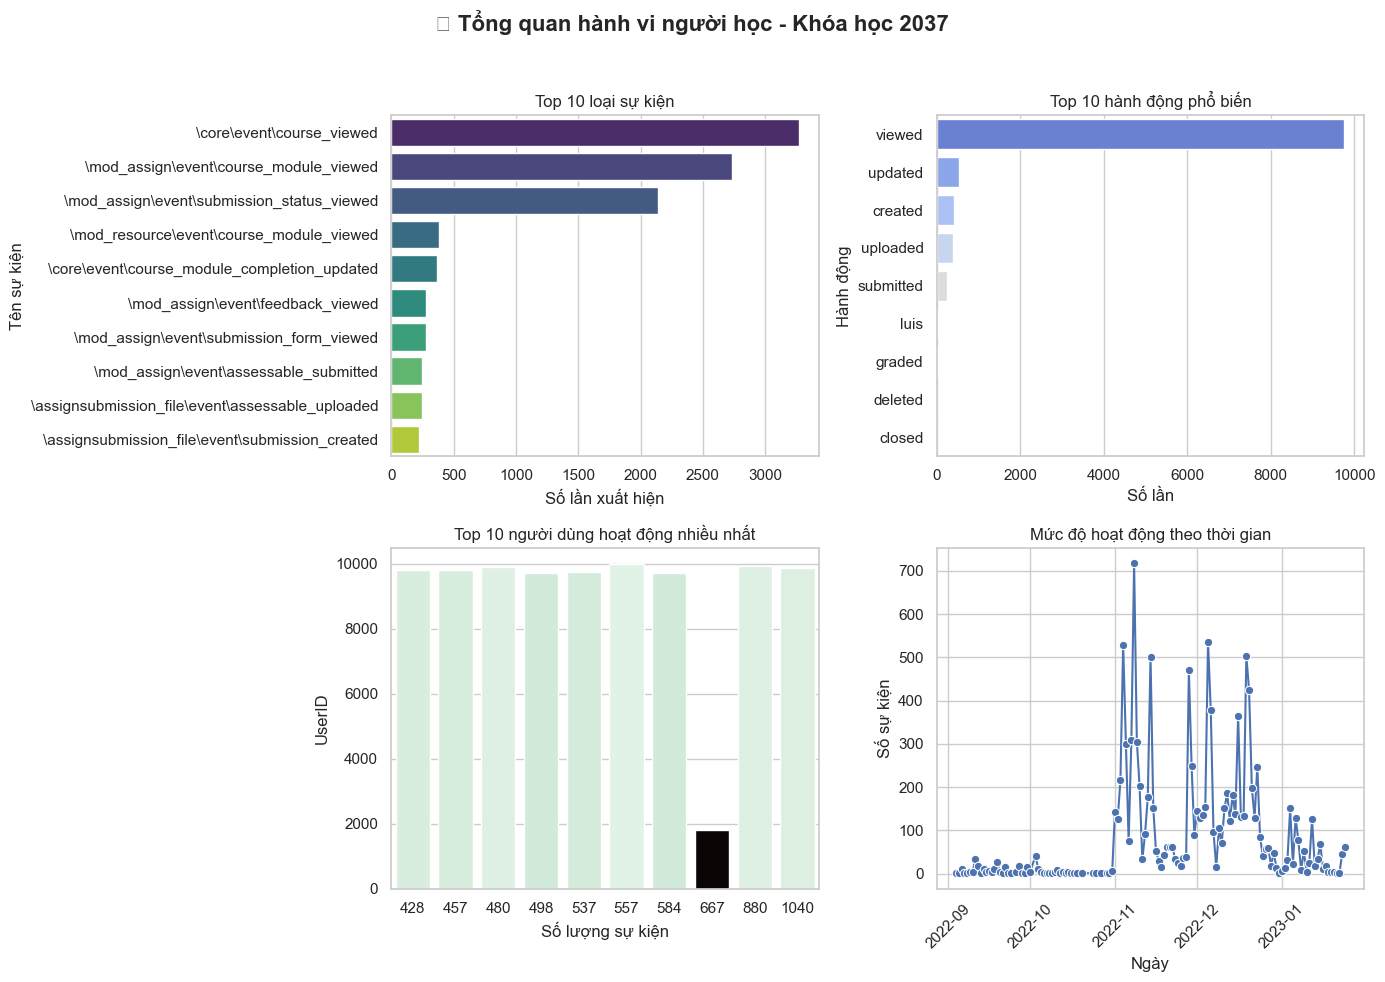

Số loại sự kiện khác nhau: 43

Top eventname:
eventname
\core\event\course_viewed                           3267
\mod_assign\event\course_module_viewed              2733
\mod_assign\event\submission_status_viewed          2141
\mod_resource\event\course_module_viewed             380
\core\event\course_module_completion_updated         370
\mod_assign\event\feedback_viewed                    276
\mod_assign\event\submission_form_viewed             276
\mod_assign\event\assessable_submitted               246
\assignsubmission_file\event\assessable_uploaded     246
\assignsubmission_file\event\submission_created      218
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 1662: 11185 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


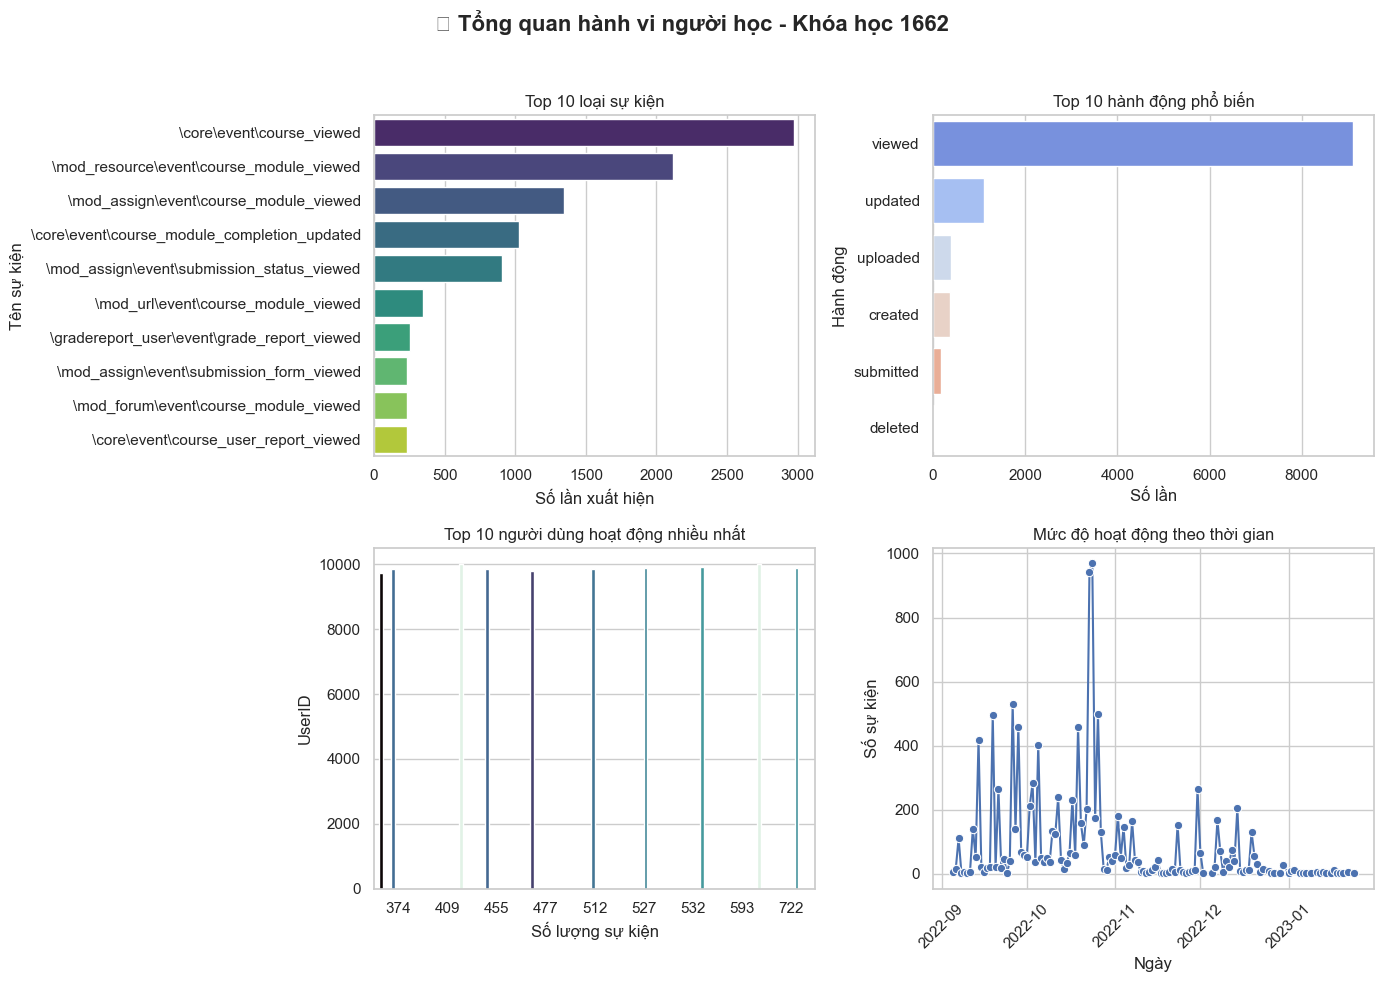

Số loại sự kiện khác nhau: 40

Top eventname:
eventname
\core\event\course_viewed                       2975
\mod_resource\event\course_module_viewed        2118
\mod_assign\event\course_module_viewed          1342
\core\event\course_module_completion_updated    1027
\mod_assign\event\submission_status_viewed       908
\mod_url\event\course_module_viewed              344
\gradereport_user\event\grade_report_viewed      255
\mod_assign\event\submission_form_viewed         237
\mod_forum\event\course_module_viewed            236
\core\event\course_user_report_viewed            235
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 677: 10436 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


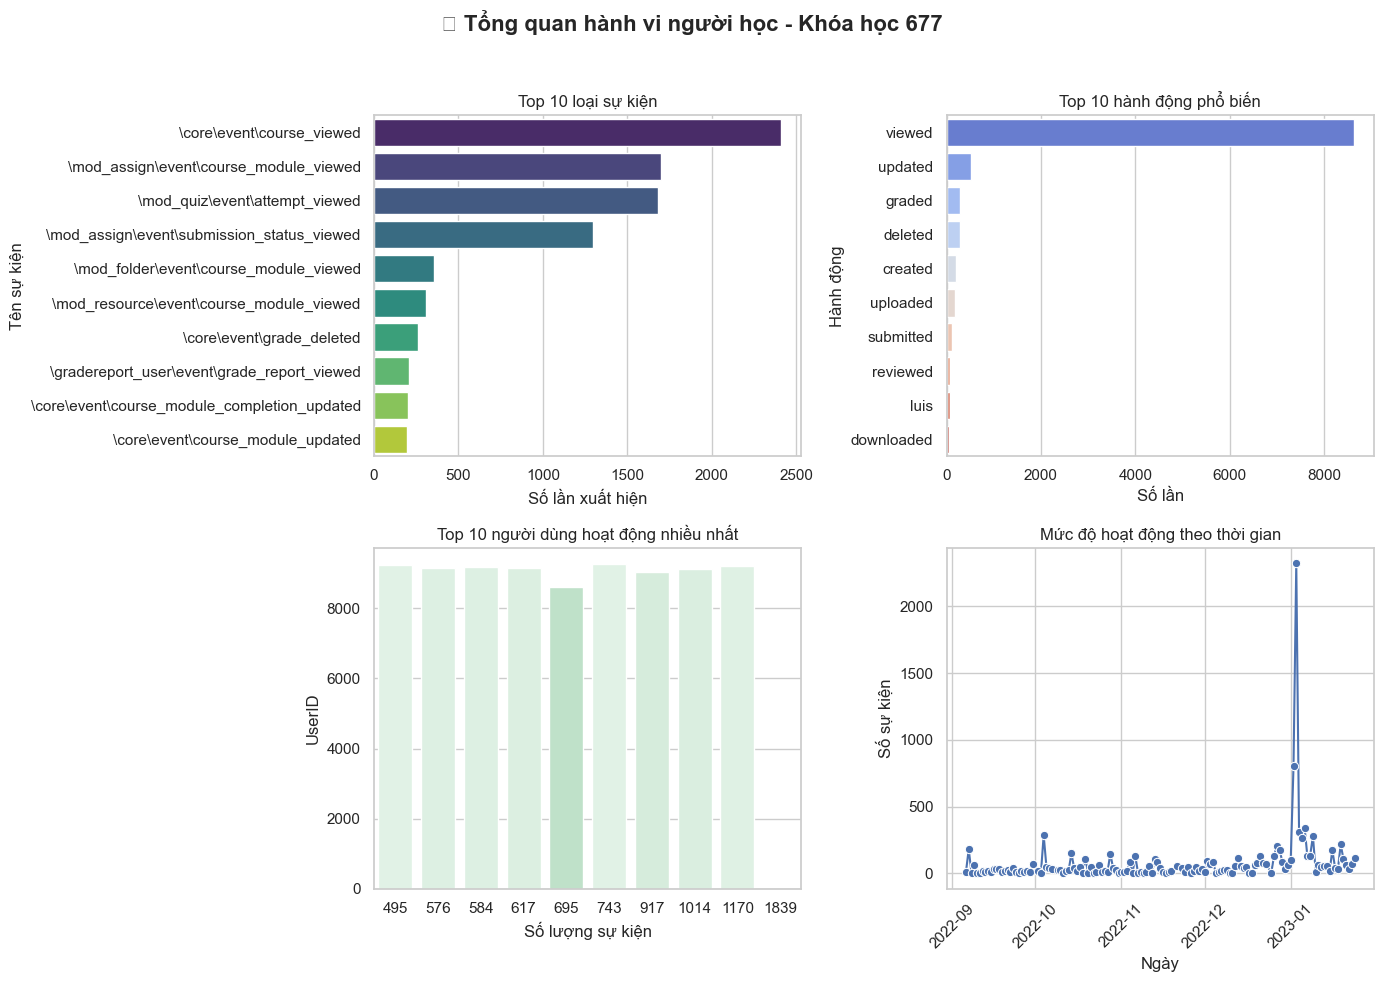

Số loại sự kiện khác nhau: 59

Top eventname:
eventname
\core\event\course_viewed                       2411
\mod_assign\event\course_module_viewed          1699
\mod_quiz\event\attempt_viewed                  1679
\mod_assign\event\submission_status_viewed      1298
\mod_folder\event\course_module_viewed           357
\mod_resource\event\course_module_viewed         309
\core\event\grade_deleted                        261
\gradereport_user\event\grade_report_viewed      205
\core\event\course_module_completion_updated     204
\core\event\course_module_updated                197
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 2675: 9236 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


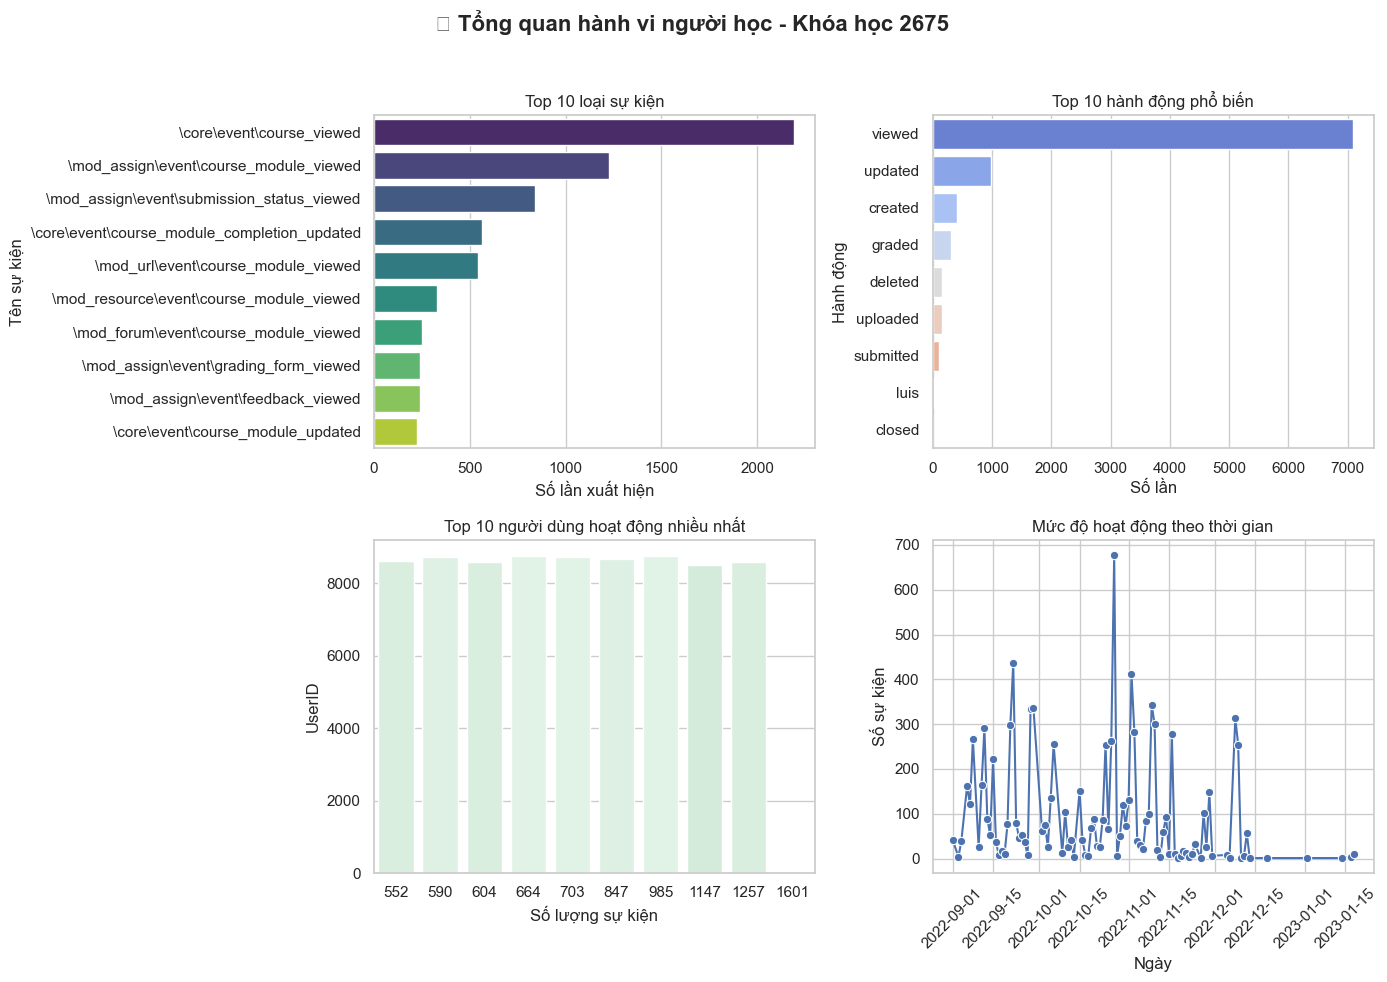

Số loại sự kiện khác nhau: 78

Top eventname:
eventname
\core\event\course_viewed                       2191
\mod_assign\event\course_module_viewed          1228
\mod_assign\event\submission_status_viewed       839
\core\event\course_module_completion_updated     562
\mod_url\event\course_module_viewed              542
\mod_resource\event\course_module_viewed         330
\mod_forum\event\course_module_viewed            249
\mod_assign\event\grading_form_viewed            242
\mod_assign\event\feedback_viewed                239
\core\event\course_module_updated                222
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 2039: 8642 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


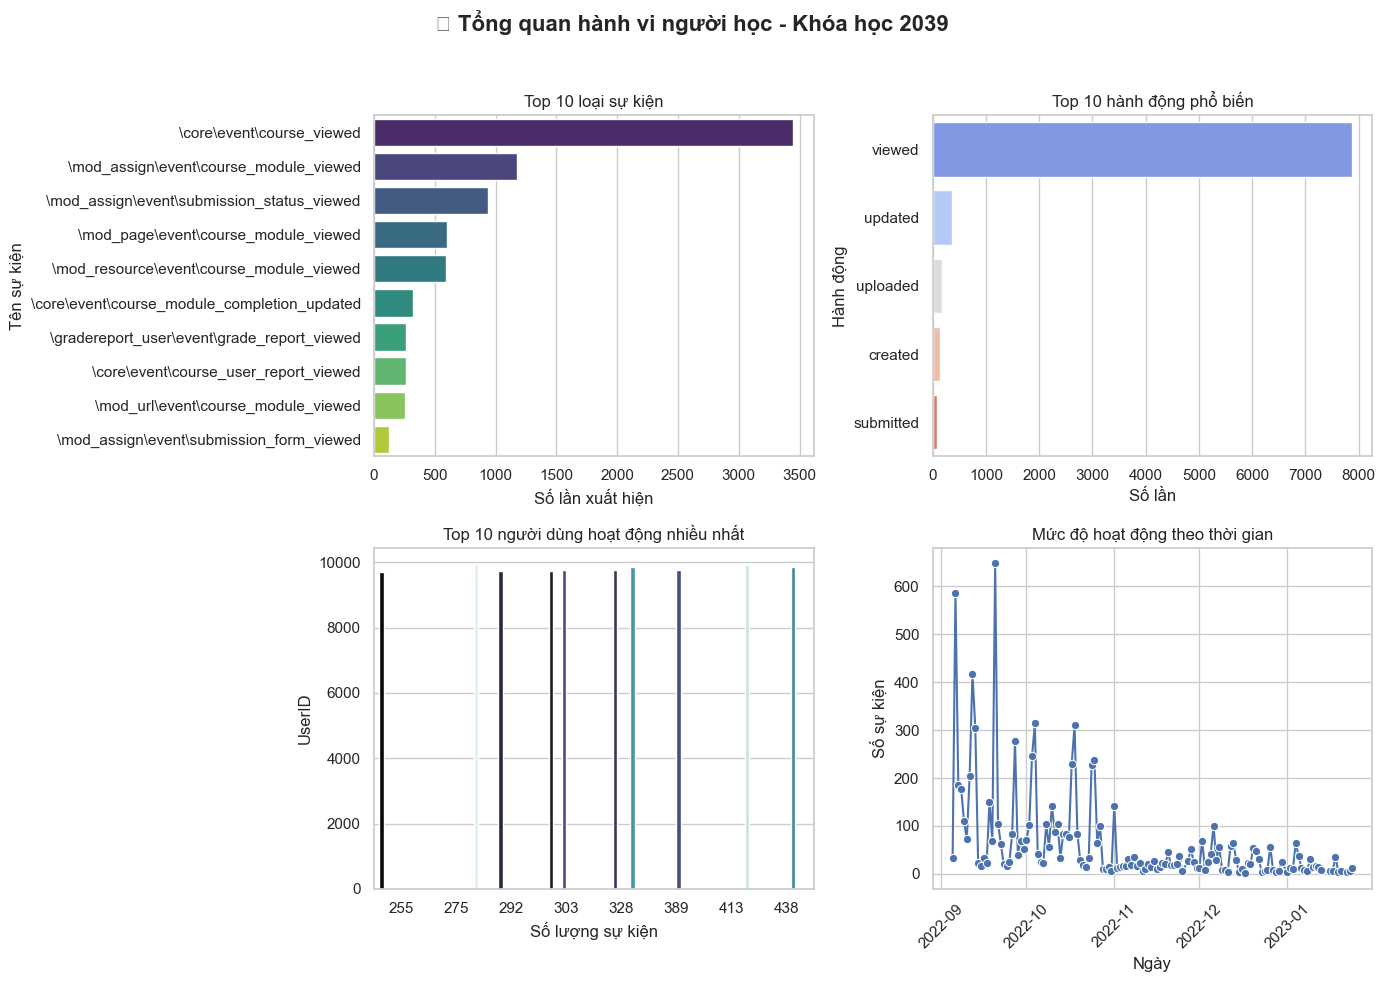

Số loại sự kiện khác nhau: 25

Top eventname:
eventname
\core\event\course_viewed                       3445
\mod_assign\event\course_module_viewed          1173
\mod_assign\event\submission_status_viewed       940
\mod_page\event\course_module_viewed             604
\mod_resource\event\course_module_viewed         588
\core\event\course_module_completion_updated     319
\gradereport_user\event\grade_report_viewed      263
\core\event\course_user_report_viewed            263
\mod_url\event\course_module_viewed              254
\mod_assign\event\submission_form_viewed         124
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 2050: 8503 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


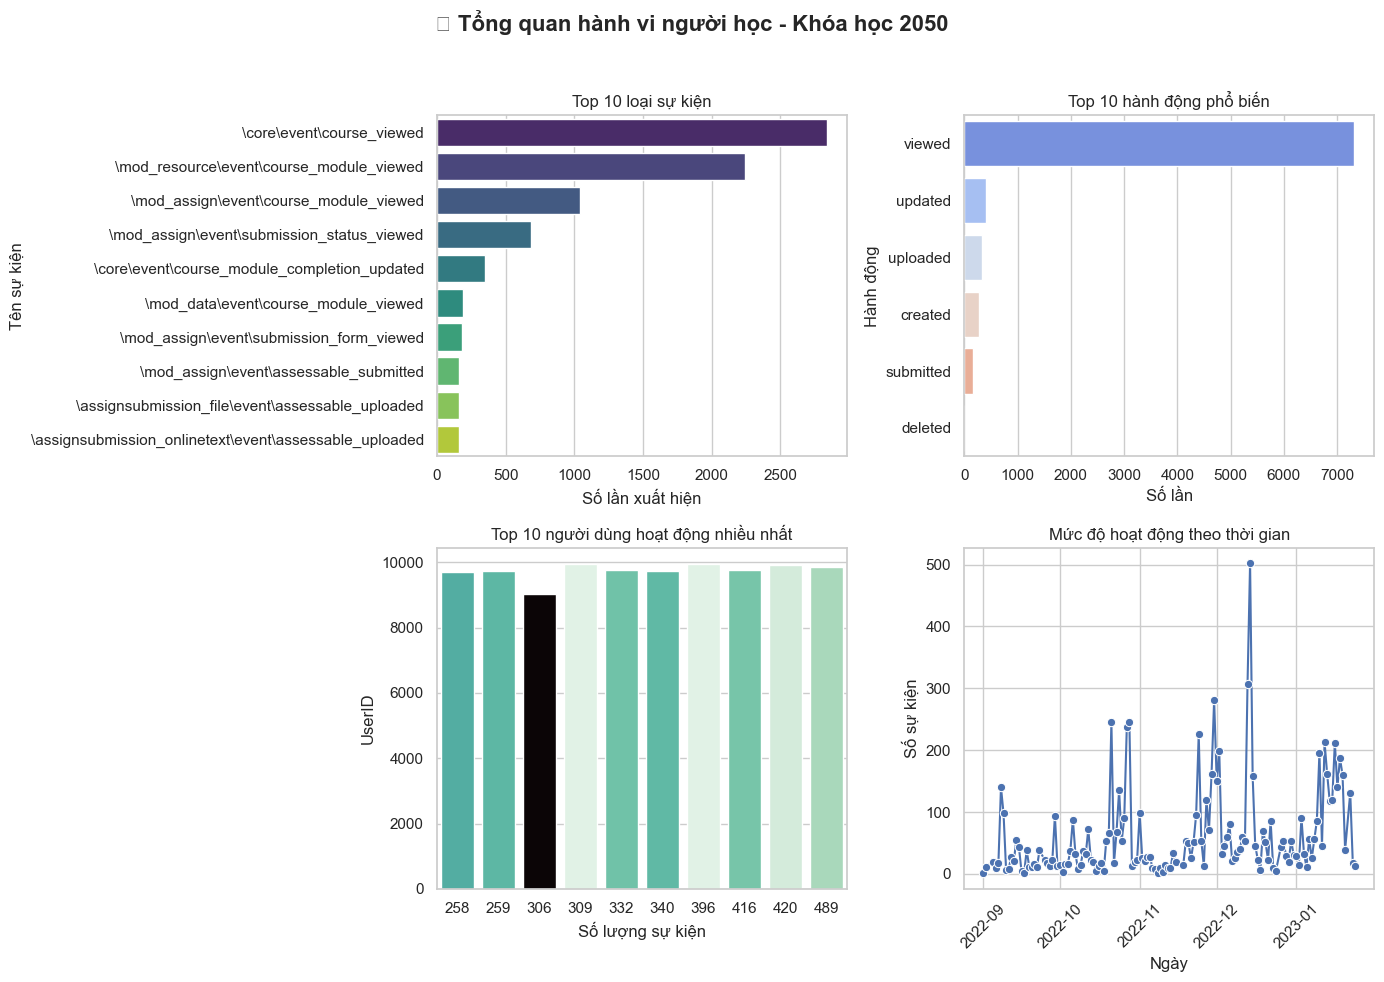

Số loại sự kiện khác nhau: 30

Top eventname:
eventname
\core\event\course_viewed                                 2842
\mod_resource\event\course_module_viewed                  2244
\mod_assign\event\course_module_viewed                    1039
\mod_assign\event\submission_status_viewed                 684
\core\event\course_module_completion_updated               348
\mod_data\event\course_module_viewed                       187
\mod_assign\event\submission_form_viewed                   185
\mod_assign\event\assessable_submitted                     162
\assignsubmission_file\event\assessable_uploaded           162
\assignsubmission_onlinetext\event\assessable_uploaded     162
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 3128: 8364 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


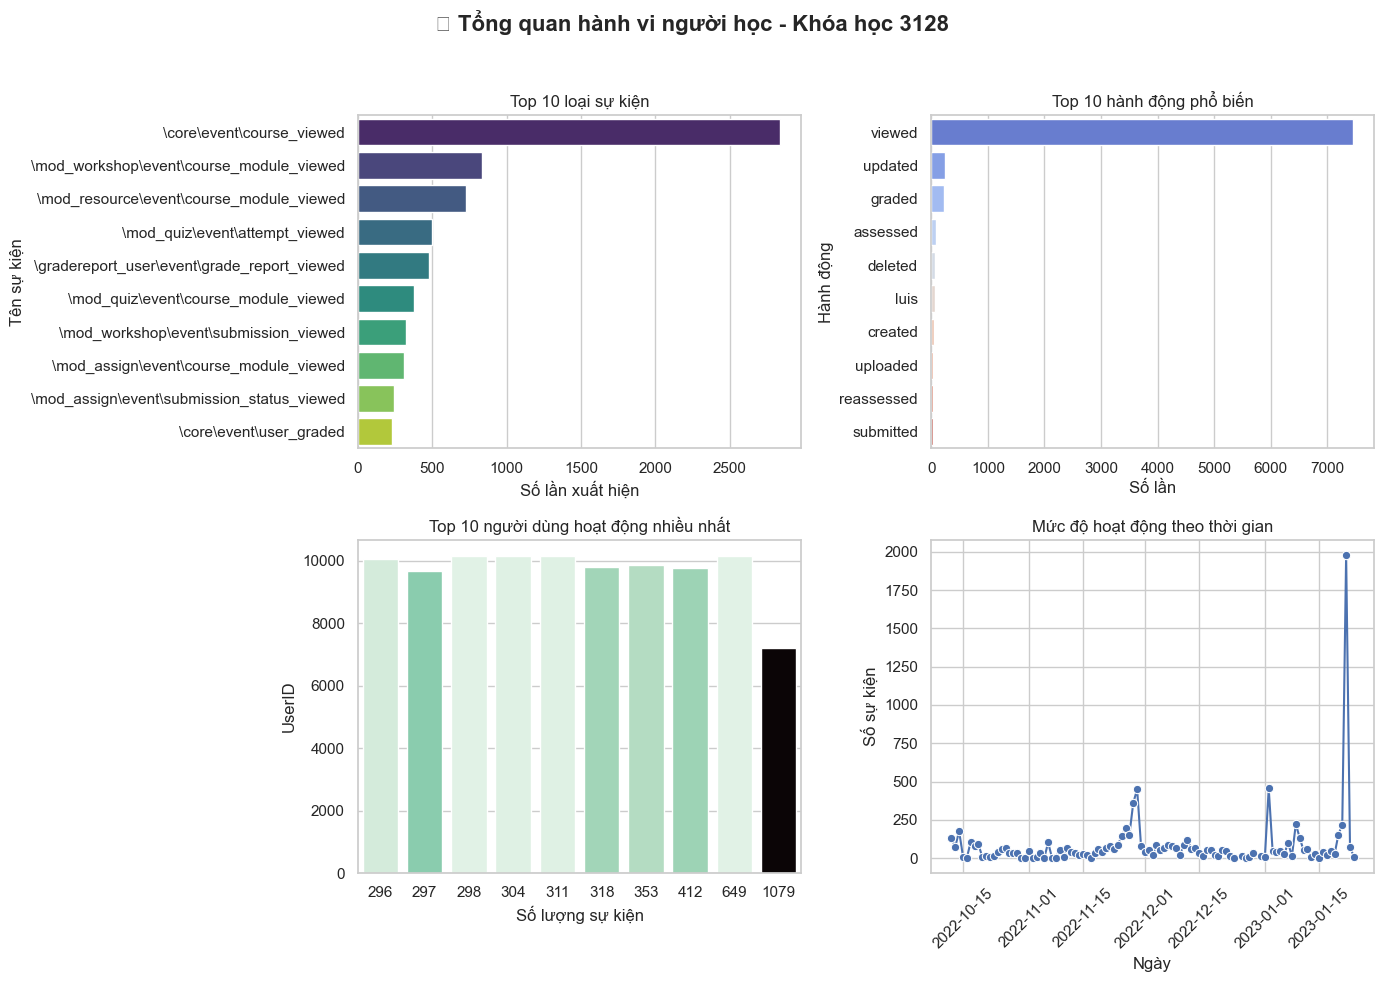

Số loại sự kiện khác nhau: 60

Top eventname:
eventname
\core\event\course_viewed                      2838
\mod_workshop\event\course_module_viewed        835
\mod_resource\event\course_module_viewed        723
\mod_quiz\event\attempt_viewed                  495
\gradereport_user\event\grade_report_viewed     479
\mod_quiz\event\course_module_viewed            377
\mod_workshop\event\submission_viewed           322
\mod_assign\event\course_module_viewed          309
\mod_assign\event\submission_status_viewed      239
\core\event\user_graded                         228
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 2031: 8170 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


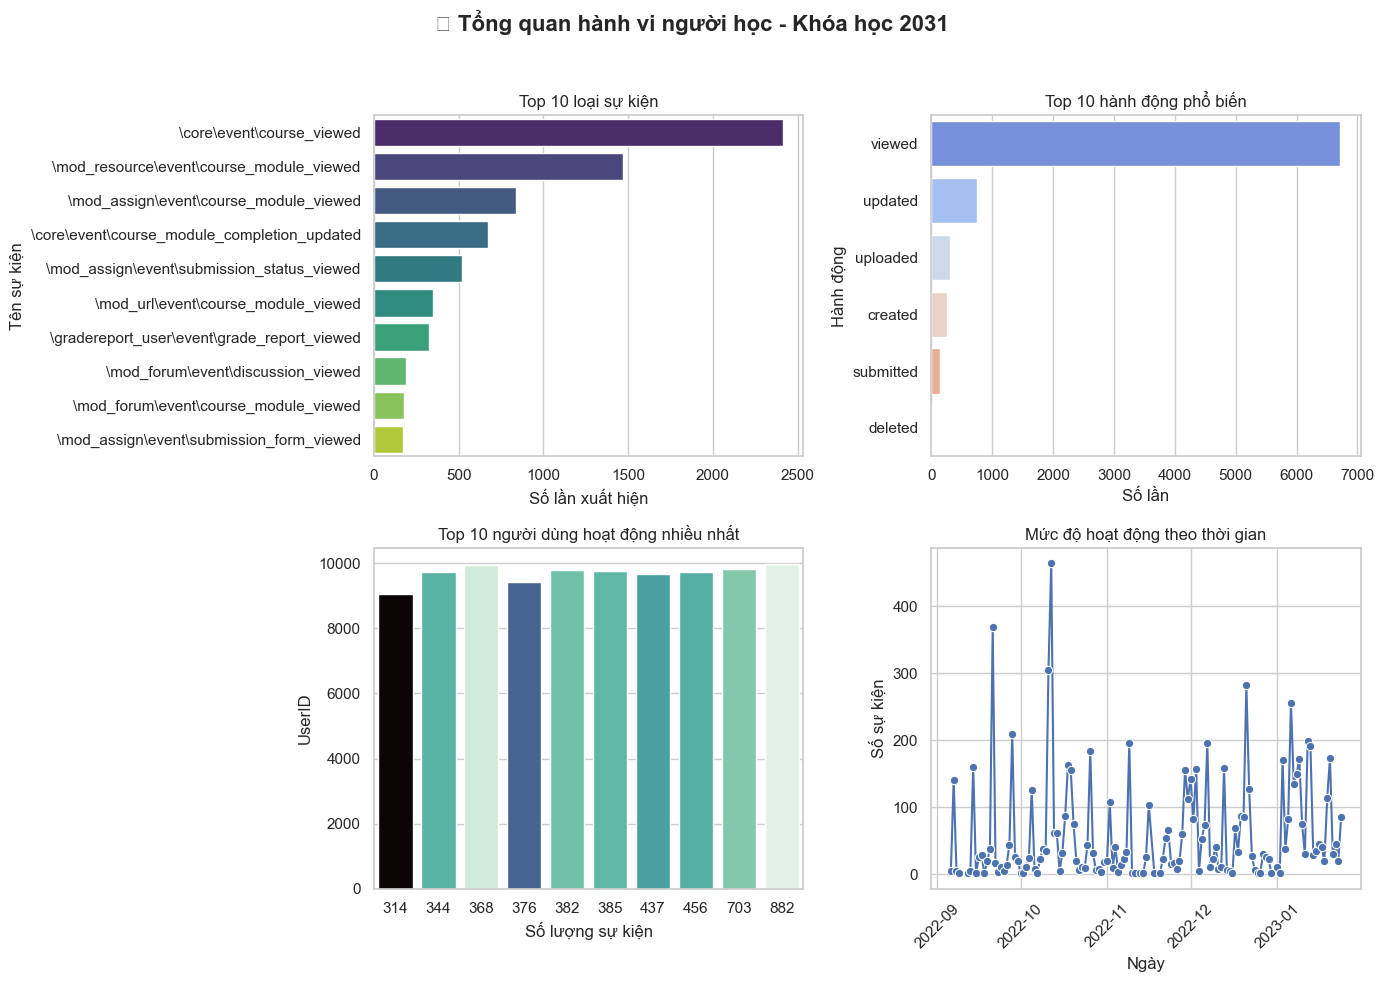

Số loại sự kiện khác nhau: 36

Top eventname:
eventname
\core\event\course_viewed                       2413
\mod_resource\event\course_module_viewed        1467
\mod_assign\event\course_module_viewed           836
\core\event\course_module_completion_updated     671
\mod_assign\event\submission_status_viewed       518
\mod_url\event\course_module_viewed              346
\gradereport_user\event\grade_report_viewed      326
\mod_forum\event\discussion_viewed               190
\mod_forum\event\course_module_viewed            180
\mod_assign\event\submission_form_viewed         173
Name: count, dtype: int64
--------------------------------------------------------------------------------
📘 Khóa học 2042: 7559 sự kiện


/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_77093/257853842.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


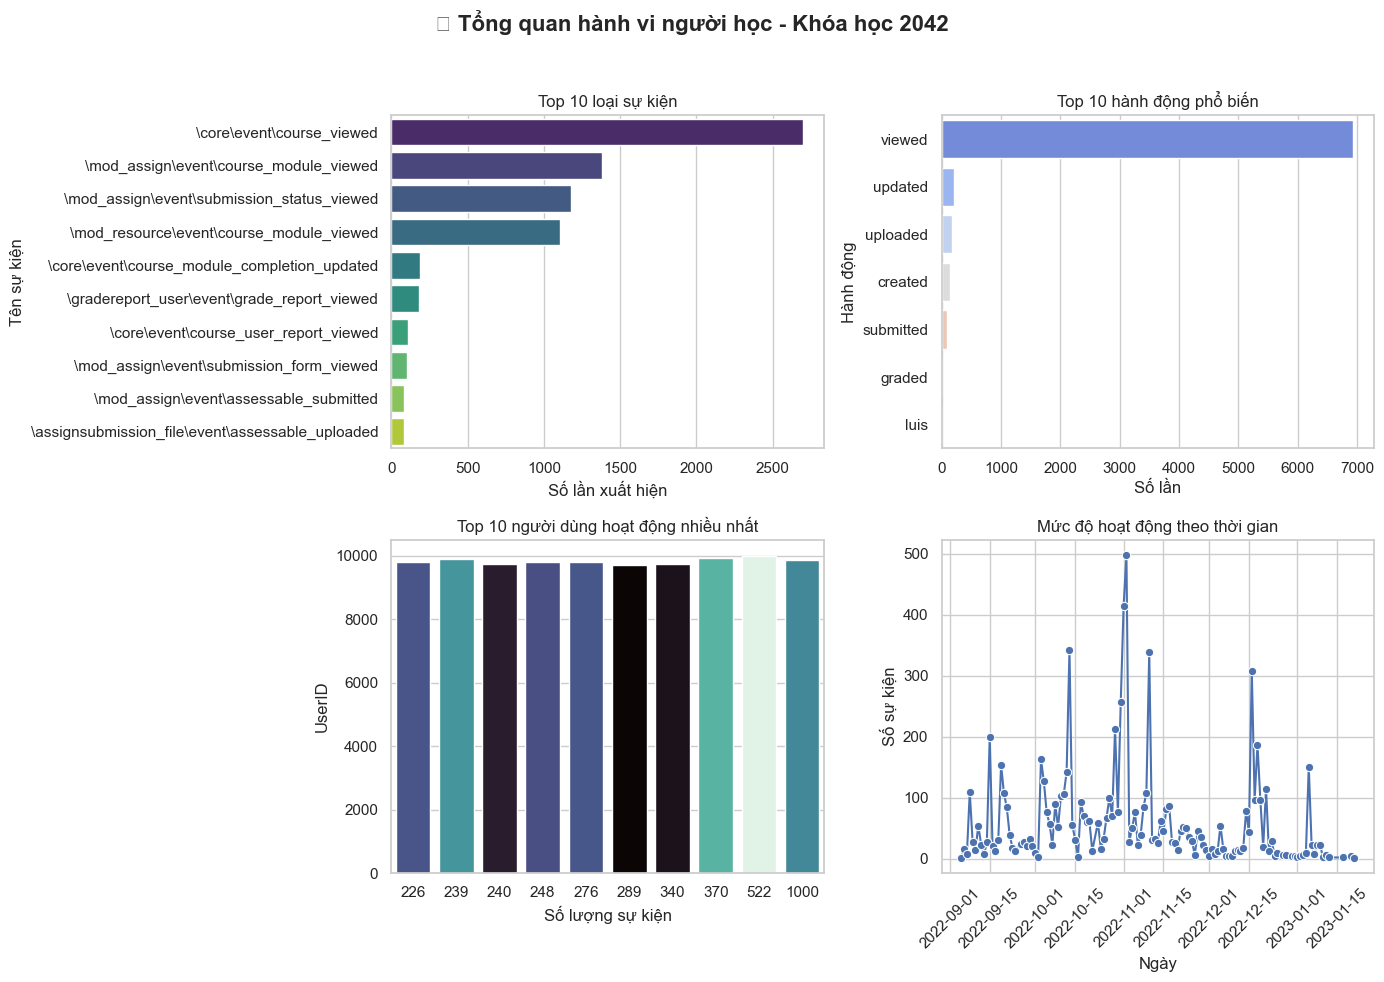

Số loại sự kiện khác nhau: 28

Top eventname:
eventname
\core\event\course_viewed                           2700
\mod_assign\event\course_module_viewed              1379
\mod_assign\event\submission_status_viewed          1179
\mod_resource\event\course_module_viewed            1103
\core\event\course_module_completion_updated         188
\gradereport_user\event\grade_report_viewed          183
\core\event\course_user_report_viewed                106
\mod_assign\event\submission_form_viewed             101
\mod_assign\event\assessable_submitted                84
\assignsubmission_file\event\assessable_uploaded      84
Name: count, dtype: int64
--------------------------------------------------------------------------------


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Chuẩn bị dữ liệu ---
array_course_ids = [1, 42, 25, 670, 1695, 1445, 2037, 1662, 677, 2675, 2039, 2050, 3128, 2031, 2042]
df_filtered = pd.read_csv("../data/udk_moodle_log_filtered.csv")
df_filtered['timecreated'] = pd.to_datetime(df_filtered['timecreated'], errors='coerce')

# --- Vẽ biểu đồ cho từng khóa học ---
for course_id in array_course_ids:
    df_course = df_filtered[df_filtered['courseid'] == course_id].copy()
    if df_course.empty:
        print(f"⚠️ Không có dữ liệu cho khóa học {course_id}")
        continue

    print(f"📘 Khóa học {course_id}: {len(df_course)} sự kiện")
    
    # --- Tạo các thống kê ---
    top_events = df_course['eventname'].value_counts().head(10)
    top_actions = df_course['action'].value_counts().head(10)
    top_users = df_course['userid'].value_counts().head(10)
    
    df_course['date'] = df_course['timecreated'].dt.date
    activity_per_day = df_course.groupby('date')['id'].count().reset_index()

    # --- Tạo layout 2x2 ---
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"📊 Tổng quan hành vi người học - Khóa học {course_id}", fontsize=16, fontweight='bold')

    # --- 1️⃣ Top 10 eventname ---
    sns.barplot(x=top_events.values, y=top_events.index, hue=top_events.index, legend=False,
                palette='viridis', ax=axes[0,0])
    axes[0,0].set_title("Top 10 loại sự kiện", fontsize=12)
    axes[0,0].set_xlabel("Số lần xuất hiện")
    axes[0,0].set_ylabel("Tên sự kiện")

    # --- 2️⃣ Top 10 hành động ---
    sns.barplot(x=top_actions.values, y=top_actions.index, hue=top_actions.index, legend=False,
                palette='coolwarm', ax=axes[0,1])
    axes[0,1].set_title("Top 10 hành động phổ biến", fontsize=12)
    axes[0,1].set_xlabel("Số lần")
    axes[0,1].set_ylabel("Hành động")

    # --- 3️⃣ Top 10 người dùng hoạt động nhiều nhất ---
    sns.barplot(x=top_users.values, y=top_users.index, hue=top_users.index, legend=False,
                palette='mako', ax=axes[1,0])
    axes[1,0].set_title("Top 10 người dùng hoạt động nhiều nhất", fontsize=12)
    axes[1,0].set_xlabel("Số lượng sự kiện")
    axes[1,0].set_ylabel("UserID")

    # --- 4️⃣ Mức độ hoạt động theo thời gian ---
    sns.lineplot(data=activity_per_day, x='date', y='id', marker='o', ax=axes[1,1])
    axes[1,1].set_title("Mức độ hoạt động theo thời gian", fontsize=12)
    axes[1,1].set_xlabel("Ngày")
    axes[1,1].set_ylabel("Số sự kiện")
    axes[1,1].tick_params(axis='x', rotation=45)

    # --- Căn chỉnh & hiển thị ---
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print("Số loại sự kiện khác nhau:", df_course['eventname'].nunique())
    print("\nTop eventname:")
    print(df_course['eventname'].value_counts().head(10))
    print("-" * 80)

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_12198/1793830612.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


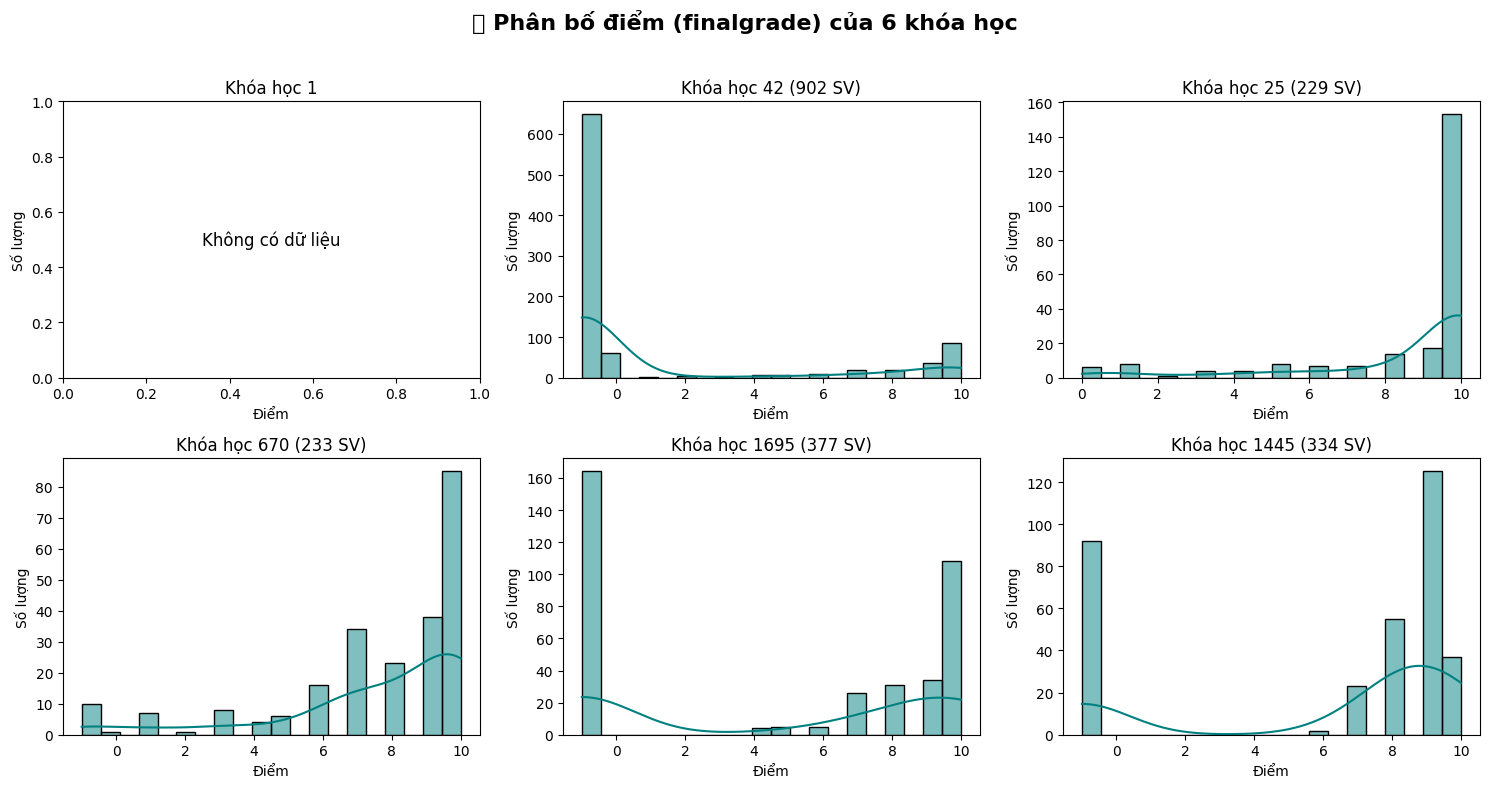

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Đọc dữ liệu điểm ===
df_grade = pd.read_csv("../data/udk_moodle_all_grades.csv")

# === 2. Danh sách khóa học cần phân tích ===
array_course_ids = [1, 42, 25, 670, 1695, 1445, 2037, 1662, 677, 2675, 2039, 2050, 3128, 2031, 2042]

# === 3. Chọn 6 khóa học đầu tiên để vẽ ===
selected_courses = array_course_ids[:6]

# === 4. Thiết lập layout ===
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("📊 Phân bố điểm (finalgrade) của 6 khóa học", fontsize=16, fontweight='bold')

# === 5. Vẽ từng biểu đồ ===
for i, course_id in enumerate(selected_courses):
    ax = axes[i // 3, i % 3]
    df_course = df_grade[df_grade['courseid'] == course_id]
    
    if not df_course.empty and 'finalgrade' in df_course.columns:
        sns.histplot(df_course['finalgrade'], bins=20, kde=True, color='teal', ax=ax)
        ax.set_title(f"Khóa học {course_id} ({len(df_course)} SV)", fontsize=12)
        ax.set_xlabel("Điểm")
        ax.set_ylabel("Số lượng")
    else:
        ax.text(0.5, 0.5, "Không có dữ liệu", ha='center', va='center', fontsize=12)
        ax.set_title(f"Khóa học {course_id}", fontsize=12)
        ax.set_xlabel("Điểm")
        ax.set_ylabel("Số lượng")

# === 6. Căn chỉnh bố cục ===
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()